In [ ]:
# pip install seaborn
# !pip install xgboost
# !pip install scikit-learn

In [190]:
import pandas as pd
import numpy as np
import os
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

import xgboost as xgb


In [ ]:
# emission_data.index <- checks the index of the dataframe
# pd.to_date(emisson_data.index) <- change the index format to date or date and time


In [37]:
emission_data_train = pd.read_csv('C:\\Users\\harve\\Downloads\\train.csv', low_memory=False)

In [ ]:
emission_data_test = pd.read_csv('C:\\Users\\harve\\Downloads\\test.csv', low_memory=False)

In [28]:
emission_data_train.tail()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792
79022,ID_-3.299_30.301_2021_52,-3.299,30.301,2021,52,-0.000091,0.871951,-0.000079,0.000000,76.825638,...,7553.295016,47771.681887,6553.295018,19.464032,0.226276,-12.808528,47.923441,-136.299984,30.246387,27.239302


In [29]:
emission_data_train["year"].unique()


array([2019, 2020, 2021], dtype=int64)

In [13]:
emission_data_train_2019 = emission_data_train[emission_data_train["year"]==2019]

emission_data_train_2020 = emission_data_train[emission_data_train["year"]==2020]

emission_data_train_2021 = emission_data_train[emission_data_train["year"]==2021]

In [11]:
emission_data_train[emission_data_train["year"]==2021]

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
106,ID_-0.510_29.290_2021_00,-0.510,29.290,2021,0,NaN,NaN,NaN,NaN,NaN,...,8158.284912,43203.886719,7158.284912,13.620904,0.348412,-12.744946,60.345203,-140.402161,31.679763,3.319557
107,ID_-0.510_29.290_2021_01,-0.510,29.290,2021,1,7.495098e-07,0.721342,0.000010,0.165762,75.213168,...,6981.121528,51989.007713,5989.078450,10.850882,0.313980,-30.843282,31.586801,-139.236763,29.954494,3.971814
108,ID_-0.510_29.290_2021_02,-0.510,29.290,2021,2,NaN,NaN,NaN,NaN,NaN,...,7173.032543,50188.757560,6173.032512,27.395111,0.317191,25.002771,36.570795,-141.058642,27.967284,4.030769
109,ID_-0.510_29.290_2021_03,-0.510,29.290,2021,3,1.310551e-04,0.637843,0.000083,0.156940,73.693535,...,6877.751950,52262.934955,5877.751938,8.236867,0.283179,-13.112604,42.558191,-138.909736,27.505410,4.083173
110,ID_-0.510_29.290_2021_04,-0.510,29.290,2021,4,-8.852908e-06,0.766009,-0.000020,0.116832,30.828970,...,5616.146900,59267.038012,4707.660364,7.747805,0.268286,-65.206115,45.831876,-132.634760,28.215139,4.161754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,2.839758e-04,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,8.311945e-05,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-3.392465e-05,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [38]:
# Include the locations for each year
emission_data_train_2019['location'] = (emission_data_train_2019.groupby('week_no').cumcount() % 497) + 1
emission_data_train_2020['location'] = (emission_data_train_2020.groupby('week_no').cumcount() % 497) + 1
emission_data_train_2021['location'] = (emission_data_train_2021.groupby('week_no').cumcount() % 497) + 1

In [40]:
emission_data_train_2021[emission_data_train_2021["week_no"]==0]

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,location
106,ID_-0.510_29.290_2021_00,-0.510,29.290,2021,0,NaN,NaN,NaN,NaN,NaN,...,43203.886719,7158.284912,13.620904,0.348412,-12.744946,60.345203,-140.402161,31.679763,3.319557,1
265,ID_-0.528_29.472_2021_00,-0.528,29.472,2021,0,NaN,NaN,NaN,NaN,NaN,...,35862.816406,8468.693848,26.928258,0.165474,-12.680294,60.318911,-140.141655,31.836250,3.127358,2
424,ID_-0.547_29.653_2021_00,-0.547,29.653,2021,0,NaN,NaN,NaN,NaN,NaN,...,33245.333008,9102.477539,31.407574,0.230537,-12.620838,60.251894,-139.839546,31.948181,0.469961,3
583,ID_-0.569_30.031_2021_00,-0.569,30.031,2021,0,NaN,NaN,NaN,NaN,NaN,...,44690.457031,6819.550293,78.404991,0.389910,72.468605,55.983418,-151.650864,25.450575,90.212845,4
742,ID_-0.598_29.102_2021_00,-0.598,29.102,2021,0,NaN,NaN,NaN,NaN,NaN,...,52624.530596,5734.331747,30.443385,0.372902,-12.781406,60.337599,-140.554855,31.605461,0.071976,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78334,ID_-3.153_30.347_2021_00,-3.153,30.347,2021,0,NaN,NaN,NaN,NaN,NaN,...,64491.988150,3846.303013,26.865139,0.281800,-12.547716,59.969050,-136.341732,30.806657,10.194481,493
78493,ID_-3.161_28.839_2021_00,-3.161,28.839,2021,0,NaN,NaN,NaN,NaN,NaN,...,57185.998047,4915.942261,23.255655,0.320035,-12.925995,60.336060,-138.315514,29.830642,0.100220,494
78652,ID_-3.174_29.926_2021_00,-3.174,29.926,2021,0,NaN,NaN,NaN,NaN,NaN,...,50648.526398,5785.912748,85.275243,0.274934,-12.643433,60.176611,-136.846947,30.562990,35.127510,495
78811,ID_-3.287_29.713_2021_00,-3.287,29.713,2021,0,NaN,NaN,NaN,NaN,NaN,...,47876.250000,6364.559814,45.690689,0.279499,-12.674747,60.158480,-136.993824,30.482368,31.229310,496


In [41]:
# Merge the three datasets by stacking them

new_emission_train = pd.concat([emission_data_train_2019, emission_data_train_2020, emission_data_train_2021], ignore_index=True)

In [98]:
# new train dataset

new_emission_train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,location
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,1
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,1
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,1
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,0.000048,0.834848,0.000035,0.158418,-7.925870,...,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,1
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,1


In [ ]:
# check the columns
new_emission_train.columns

In [ ]:
# Confirm the columns
emission_data_datatypes = {}

column = 0
for column in new_emission_train.columns:
    emission_data_datatypes[column] = new_emission_train[column].dtypes

In [44]:
drop_cols = [57,58,59,60,61,62,63]

new_emission_train = new_emission_train.drop(new_emission_train.columns[drop_cols], axis=1)

# emission_data_test_clean = emission_data_test.drop(emission_data_test.columns[drop_cols], axis=1)

In [47]:
new_emission_train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,location
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,1
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,1
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,1
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,1
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,1


In [66]:
# impute the mean for each column

def impute_missing_with_mean(df):
    """
    Impute missing values in each column with the mean of that column.

    Parameters:
    - df: pandas DataFrame

    
    Returns:
    - None (imputes missing values in place)
    """
    for column in df.columns:
        if df[column].isnull().any():  
            mean_value = df[column].mean()  
            df[column].fillna(mean_value, inplace=True)
    return df

# check for missing values in each column

def check_missing_values(df, num_columns:int):
    """
    Check for missing values in all columns of a dataframe.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - missing_values: pandas Series, the count of missing values for each column
    """
    missing_values = df.isnull().sum()

    if num_columns <= len(df.columns):
        # Display the missing values for the specified number of column
        for i in range(0, len(df.columns), num_columns):
                display_columns = df.columns[i:i + num_columns]
                print(missing_values[display_columns])
                print("\n" + "=" * 50 + "\n") 
    else:
        print(f'Number of columns do not exist')
                
    return missing_values


In [50]:
#use the function to handle missingness

new_emission_train_clean = impute_missing_with_mean(new_emission_train)

In [ ]:
# Check for missing values in each column
missing_values = new_emission_train_clean.isnull().any()

if missing_values.any():
    print("Missing value present.")
else:
    print("No missing value.")

In [70]:
check_missing_values(new_emission_train_clean, 10)

In [73]:
# Select all features for PCA
features_pca = new_emission_train_clean.iloc[:,5:-2]

In [75]:
# Use the 63 features for PCA
features_pca.head()

,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,...,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140
1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,...,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779
2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,-150.191757,23.206415,0.000154,0.035338,...,55923.790554,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296
3,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,-83.833174,27.722311,0.000015,0.036790,...,44569.130636,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155
4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,-137.409159,24.331972,-0.000028,0.034675,...,59904.314844,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612


In [77]:
# Standardize the data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_pca)


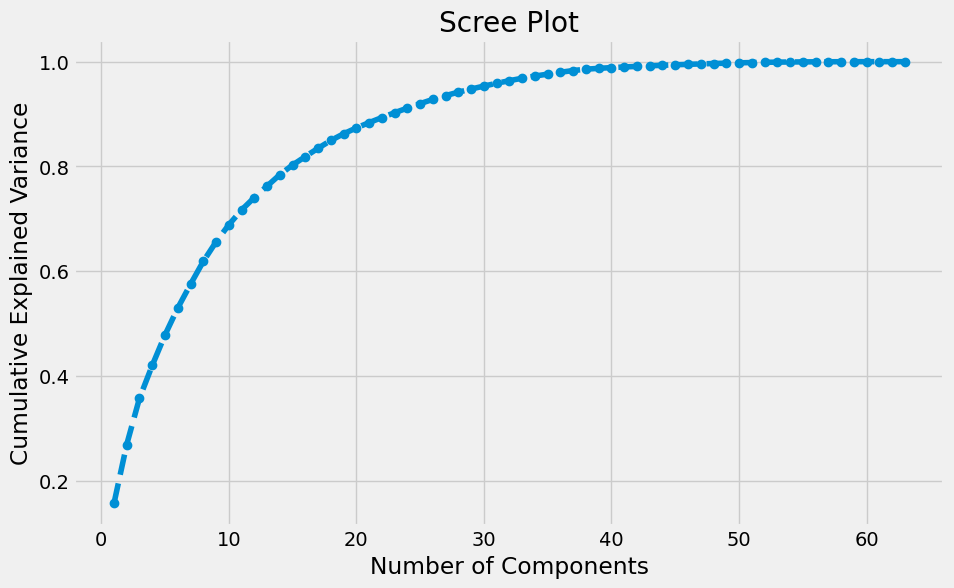

In [85]:
# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [88]:
# Get the singular values (eigenvalues) associated with each principal component
singular_values = pca.singular_values_

# Calculate the importance of each feature based on the sum of squared singular values
feature_importance = pd.Series(np.sum(components**2 * singular_values**2, axis=0), index=features_pca.columns)

# Rank features from best to worst
ranked_features = feature_importance.sort_values(ascending=False)

# Display the ranked features
print(ranked_features)

SulphurDioxide_SO2_column_number_density          778636.554184
SulphurDioxide_SO2_column_number_density_amf      560633.748892
SulphurDioxide_SO2_slant_column_number_density    439487.949431
SulphurDioxide_cloud_fraction                     312200.826061
SulphurDioxide_sensor_azimuth_angle               289698.720815
                                                      ...      
Cloud_surface_albedo                                 216.349105
Cloud_sensor_azimuth_angle                            42.940076
Cloud_sensor_zenith_angle                             34.806823
Cloud_solar_azimuth_angle                             25.801429
Cloud_solar_zenith_angle                              15.971932
Length: 63, dtype: float64


In [96]:
# Transform the values into percentages
feature_importance_percent = (feature_importance / np.sum(feature_importance)) * 100

# Create a pandas Series with feature names as index and importance percentages
ranked_features_percent = pd.Series(feature_importance_percent, index=features_pca.columns)

# Display the ranked features with percentages
ranked_features_percent[:20]

SulphurDioxide_SO2_column_number_density                   15.640143
SulphurDioxide_SO2_column_number_density_amf               11.261213
SulphurDioxide_SO2_slant_column_number_density              8.827809
SulphurDioxide_cloud_fraction                               6.271046
SulphurDioxide_sensor_azimuth_angle                         5.819056
SulphurDioxide_sensor_zenith_angle                          5.138144
SulphurDioxide_solar_azimuth_angle                          4.536075
SulphurDioxide_solar_zenith_angle                           4.361840
SulphurDioxide_SO2_column_number_density_15km               3.728805
CarbonMonoxide_CO_column_number_density                     3.256895
CarbonMonoxide_H2O_column_number_density                    2.839387
CarbonMonoxide_cloud_height                                 2.373615
CarbonMonoxide_sensor_altitude                              2.185392
CarbonMonoxide_sensor_azimuth_angle                         2.180189
CarbonMonoxide_sensor_zenith_angle

In [102]:
# Based on the PCA result, use the best 20 features including;latitude,	longitude,	year, week_no, emission and location

col_name = ['latitude',	'longitude', 'year', 'week_no', 'location',
            'SulphurDioxide_SO2_column_number_density',
            'SulphurDioxide_SO2_column_number_density_amf',
            'SulphurDioxide_SO2_slant_column_number_density',
            'SulphurDioxide_cloud_fraction',
            'SulphurDioxide_sensor_azimuth_angle',
            'SulphurDioxide_sensor_zenith_angle',
            'SulphurDioxide_solar_azimuth_angle',
            'SulphurDioxide_solar_zenith_angle',
            'SulphurDioxide_SO2_column_number_density_15km',
            'CarbonMonoxide_CO_column_number_density',
            'CarbonMonoxide_H2O_column_number_density',
            'CarbonMonoxide_cloud_height',
            'CarbonMonoxide_sensor_altitude',
            'CarbonMonoxide_sensor_azimuth_angle',
            'CarbonMonoxide_sensor_zenith_angle',
            'CarbonMonoxide_solar_azimuth_angle',
            'CarbonMonoxide_solar_zenith_angle',
            'NitrogenDioxide_NO2_column_number_density',
            'NitrogenDioxide_tropospheric_NO2_column_number_density',
            'NitrogenDioxide_stratospheric_NO2_column_number_density',
            'emission']


In [103]:
train = new_emission_train_clean[col_name]

In [104]:
train

,latitude,longitude,year,week_no,location,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,emission
0,-0.510,29.290,2019,0,1,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,4061.098145,829530.500000,71.111977,52.775928,-149.875565,25.965214,0.000044,1.220016e-05,0.000032,3.750994
1,-0.510,29.290,2019,1,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,1869.040414,829787.287130,-1.019594,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.000030,4.025176
2,-0.510,29.290,2019,2,1,0.000514,0.748199,0.000385,0.110018,72.795837,...,2809.138386,829883.828686,-54.801144,52.344378,-133.683714,31.586838,0.000031,4.267369e-07,0.000030,4.231381
3,-0.510,29.290,2019,3,1,0.000048,0.834848,0.000035,0.158418,-7.925870,...,3917.707873,829657.163571,28.916541,39.676184,-142.575915,24.810699,0.000044,1.220016e-05,0.000032,4.305286
4,-0.510,29.290,2019,4,1,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,2667.310013,829735.093750,-12.501663,33.703073,-134.854258,24.629593,0.000051,2.056437e-05,0.000030,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,497,0.000284,1.195643,0.000340,0.191313,72.820518,...,2686.895807,830284.702006,-40.598012,59.988967,-127.665868,35.158394,0.000048,8.024310e-06,0.000040,29.404171
79019,-3.299,30.301,2021,49,497,0.000083,1.130868,0.000063,0.177222,-12.856753,...,2474.702943,830215.390420,-12.598181,35.733741,-131.715914,31.659301,0.000049,8.476496e-06,0.000040,29.186497
79020,-3.299,30.301,2021,50,497,0.000048,0.834848,0.000035,0.158418,-7.925870,...,2470.528304,829859.062500,71.694785,47.004614,-142.806373,26.133751,0.000043,2.979501e-06,0.000039,29.131205
79021,-3.299,30.301,2021,51,497,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,3911.986206,830346.093750,-97.630821,32.627596,-129.550014,33.910437,0.000049,1.014400e-05,0.000039,28.125792


In [105]:

# create new features

def create_date_features(df, year_col, week_col):
    # Convert year and week to datetime
    df['date'] = pd.to_datetime(df[year_col].astype(str) + df[week_col].astype(str) + '0', format='%Y%U%w')
    
    # Extract day (as words and number)
    df['day_number'] = df['date'].dt.day
    df['day_name'] = df['date'].dt.day_name()
    
    # Extract month (as words and number)
    df['month_number'] = df['date'].dt.month
    df['month_name'] = df['date'].dt.month_name()
    
    # Extract quarter
    df['quarter'] = df['date'].dt.quarter
    
    return df


train = create_date_features(train, 'year', 'week_no')

C:\Users\harve\AppData\Local\Temp\ipykernel_17532\3009491859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df[year_col].astype(str) + df[week_col].astype(str) + '0', format='%Y%U%w')
C:\Users\harve\AppData\Local\Temp\ipykernel_17532\3009491859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_number'] = df['date'].dt.day
C:\Users\harve\AppData\Local\Temp\ipykernel_17532\3009491859.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [107]:
train = train.drop(columns=['date','day_number','day_name'])
train

,latitude,longitude,year,week_no,location,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,emission,month_number,month_name,quarter
0,-0.510,29.290,2019,0,1,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,52.775928,-149.875565,25.965214,0.000044,1.220016e-05,0.000032,3.750994,1,January,1
1,-0.510,29.290,2019,1,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.000030,4.025176,1,January,1
2,-0.510,29.290,2019,2,1,0.000514,0.748199,0.000385,0.110018,72.795837,...,52.344378,-133.683714,31.586838,0.000031,4.267369e-07,0.000030,4.231381,1,January,1
3,-0.510,29.290,2019,3,1,0.000048,0.834848,0.000035,0.158418,-7.925870,...,39.676184,-142.575915,24.810699,0.000044,1.220016e-05,0.000032,4.305286,1,January,1
4,-0.510,29.290,2019,4,1,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,33.703073,-134.854258,24.629593,0.000051,2.056437e-05,0.000030,4.347317,1,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,497,0.000284,1.195643,0.000340,0.191313,72.820518,...,59.988967,-127.665868,35.158394,0.000048,8.024310e-06,0.000040,29.404171,11,November,4
79019,-3.299,30.301,2021,49,497,0.000083,1.130868,0.000063,0.177222,-12.856753,...,35.733741,-131.715914,31.659301,0.000049,8.476496e-06,0.000040,29.186497,12,December,4
79020,-3.299,30.301,2021,50,497,0.000048,0.834848,0.000035,0.158418,-7.925870,...,47.004614,-142.806373,26.133751,0.000043,2.979501e-06,0.000039,29.131205,12,December,4
79021,-3.299,30.301,2021,51,497,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,32.627596,-129.550014,33.910437,0.000049,1.014400e-05,0.000039,28.125792,12,December,4


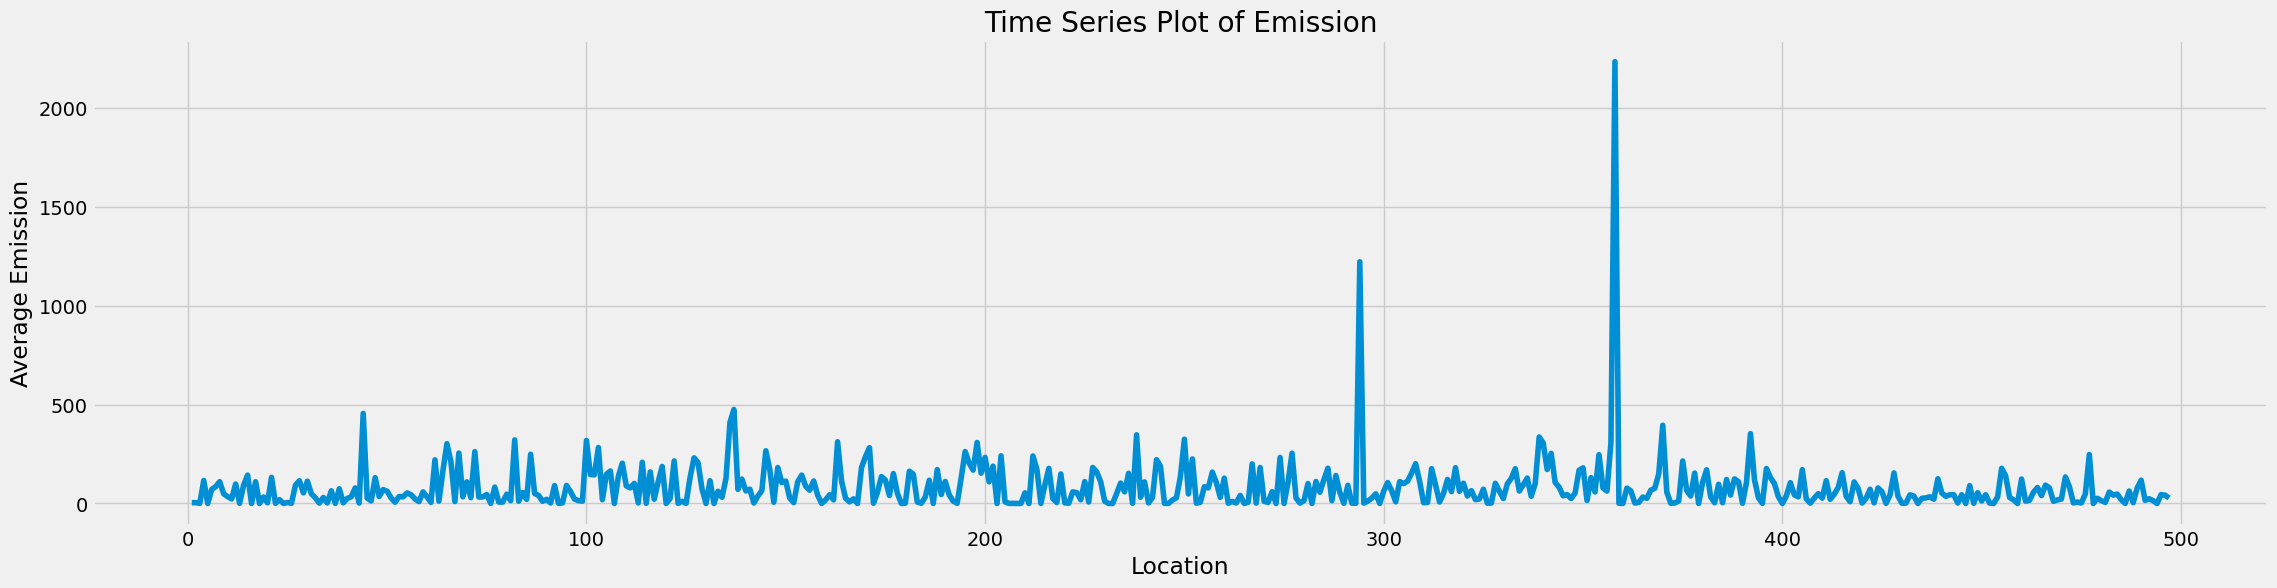

In [123]:
plt.figure(figsize=(25, 6))
mean_emission_by_location = train.groupby('location')['emission'].mean().reset_index()
sns.lineplot(x = "location", y = "emission", data= mean_emission_by_location, linestyle='-')
plt.title('Time Series Plot of Emission')
plt.xlabel('Location')
plt.ylabel('Average Emission') 
plt.show()

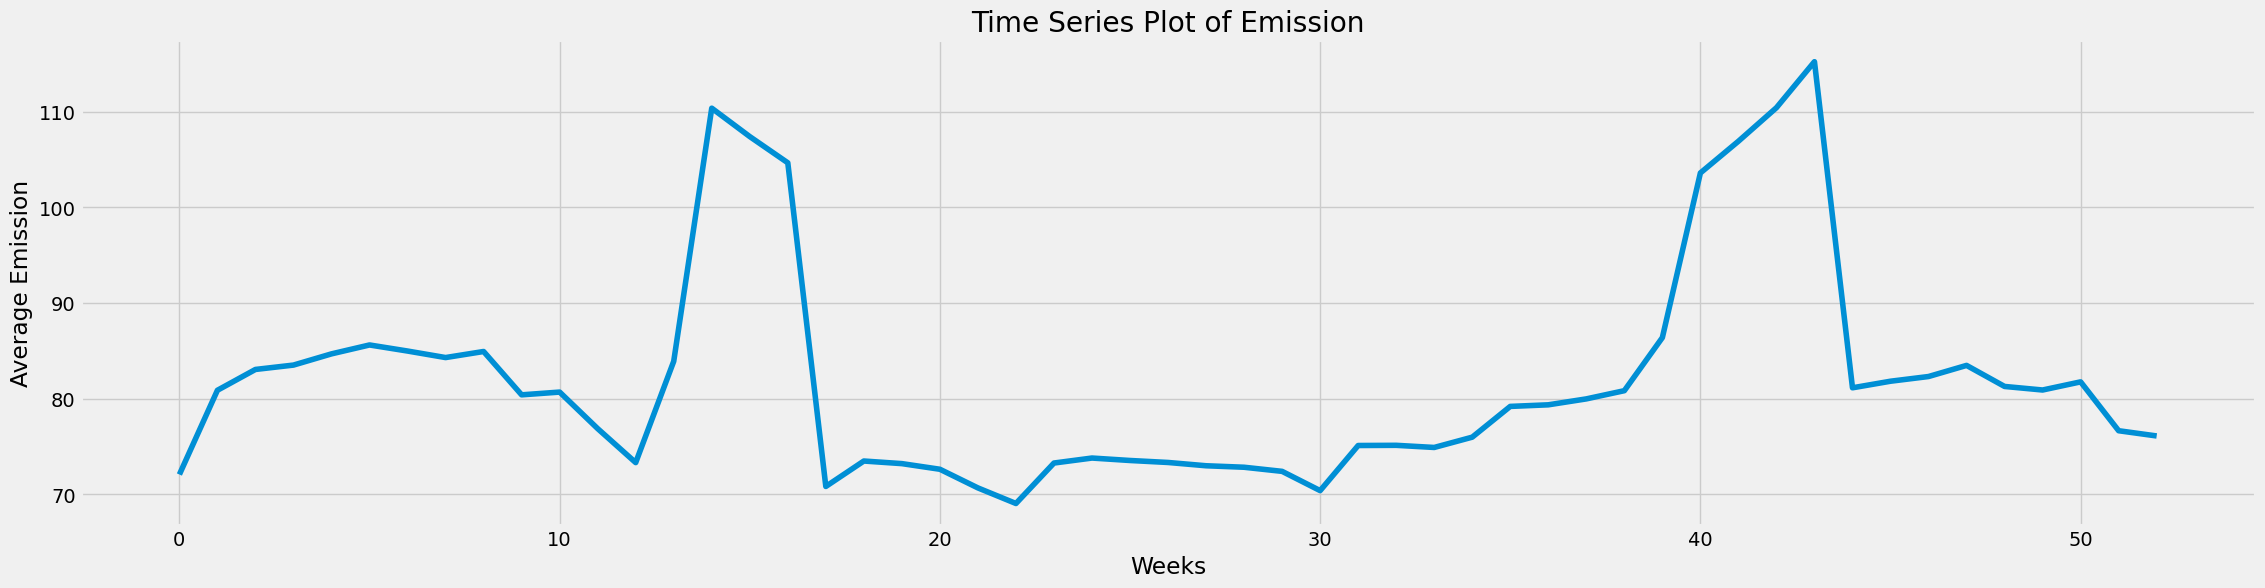

In [122]:
plt.figure(figsize=(25, 6))
mean_emission_by_week_no = train.groupby('week_no')['emission'].mean().reset_index()
sns.lineplot(x = "week_no", y = "emission", data= mean_emission_by_week_no, linestyle='-')
plt.title('Time Series Plot of Emission')
plt.xlabel('Weeks')
plt.ylabel('Average Emission')
plt.show()

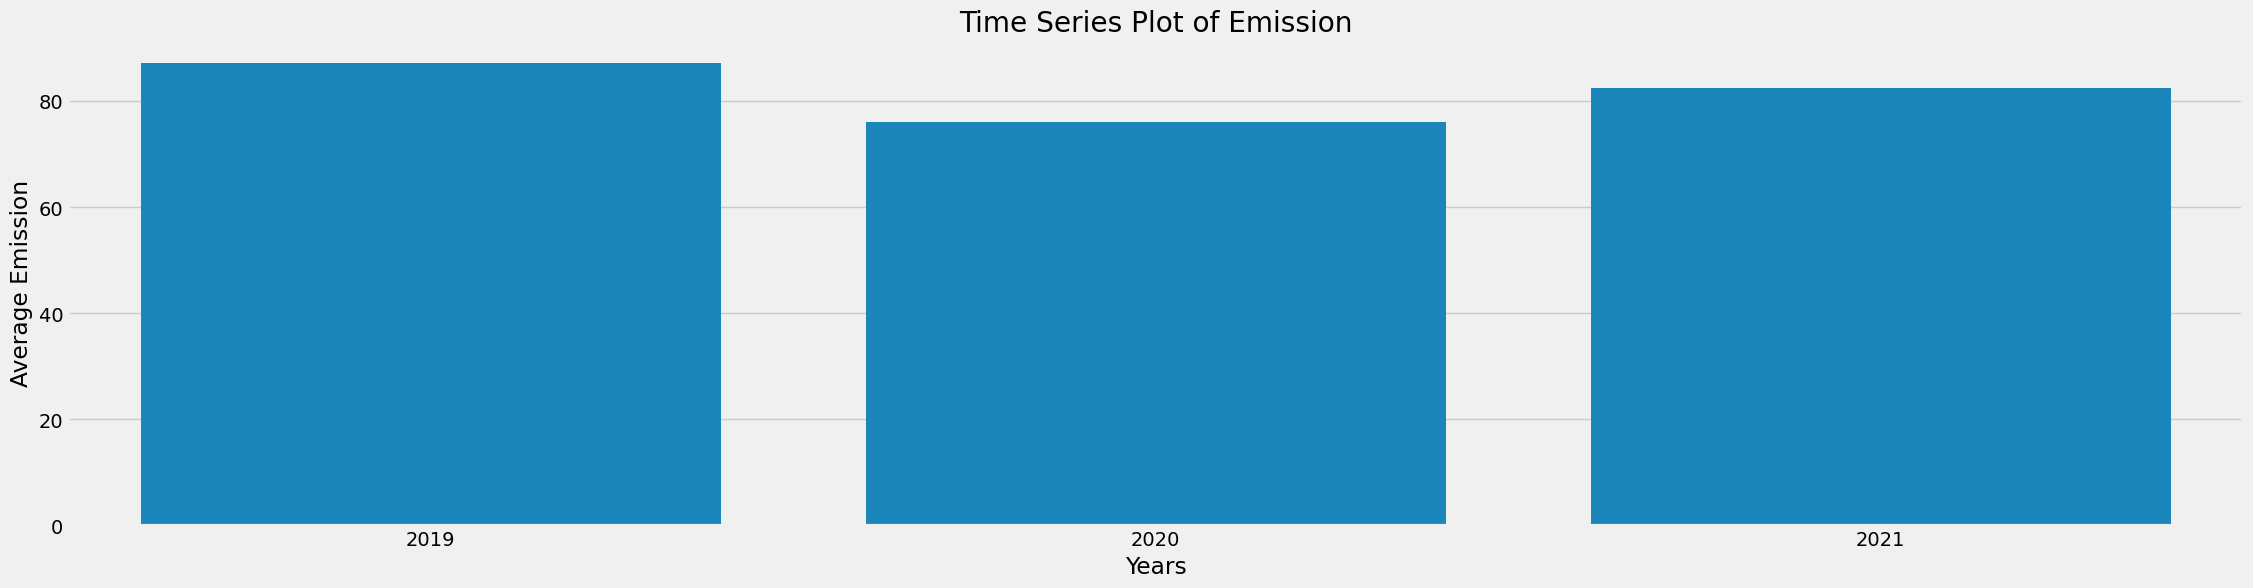

In [121]:
plt.figure(figsize=(25, 6))
mean_emission_by_year = train.groupby('year')['emission'].mean().reset_index()
sns.barplot(x = "year", y = "emission", data= mean_emission_by_year, linestyle='-')
plt.title('Time Series Plot of Emission')
plt.xlabel('Years')
plt.ylabel('Average Emission')
plt.show()

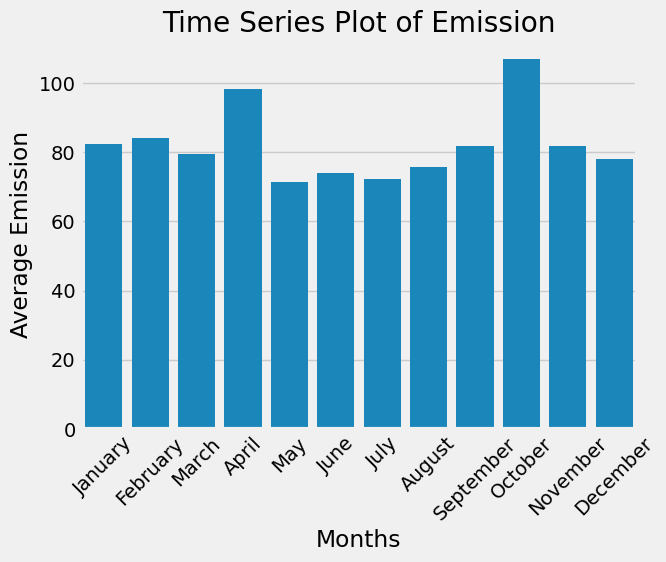

In [125]:
# Calculate mean emission by month
mean_emission_by_month = train.groupby('month_name')['emission'].mean().reset_index()

# Order the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(x="month_name", y="emission", data=mean_emission_by_month, order=month_order, linestyle='-')

plt.title('Time Series Plot of Emission')
plt.xlabel('Months')
plt.ylabel('Average Emission')
plt.xticks(rotation=45)
plt.show()

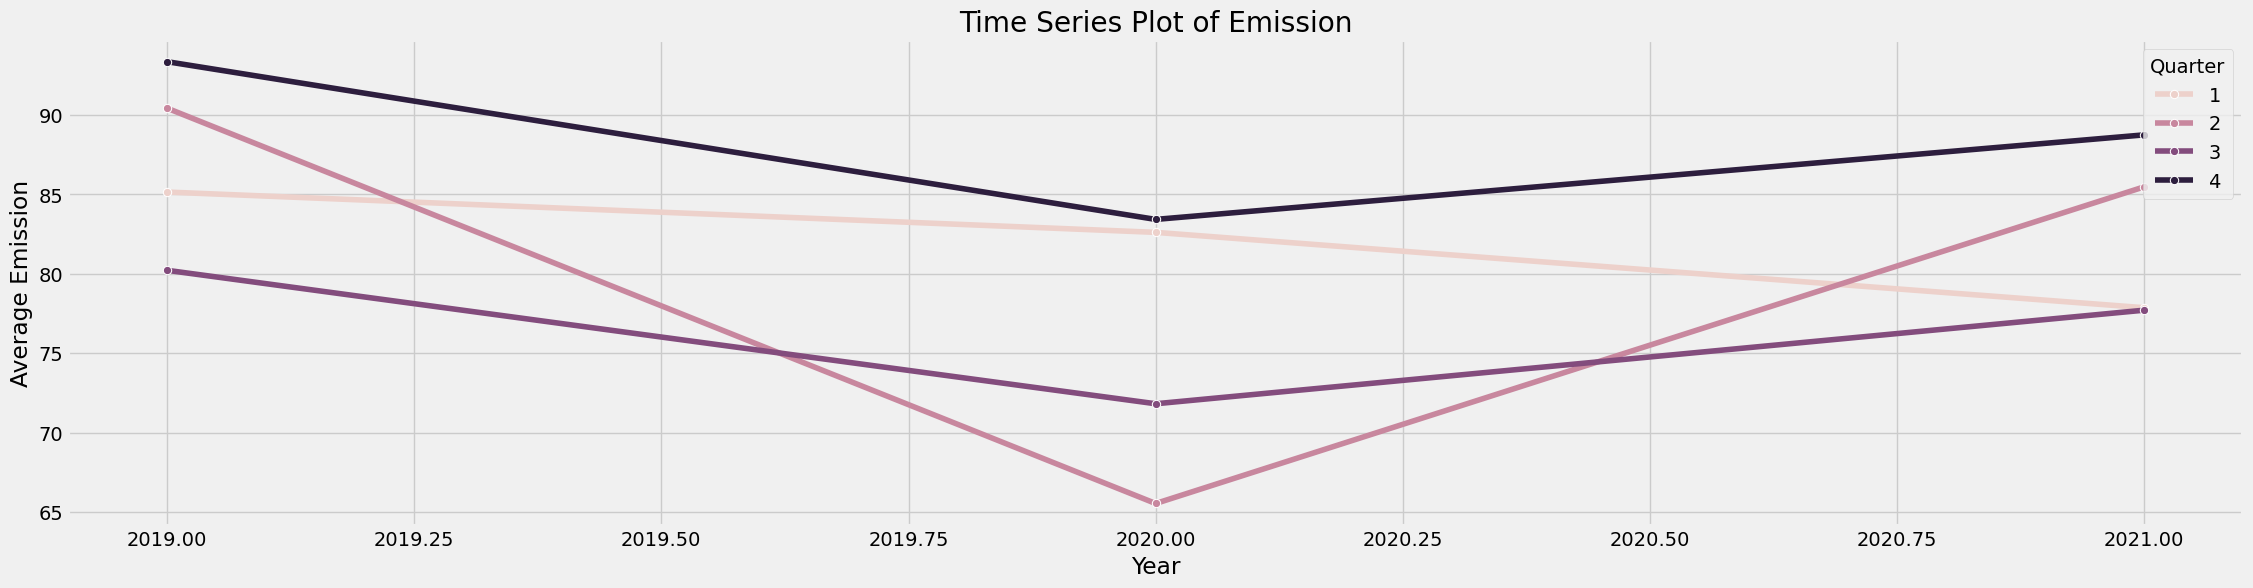

In [128]:
plt.figure(figsize=(25, 6))
mean_emission_by_quarter = train.groupby(['quarter', 'year'])['emission'].mean().reset_index()
mean_emission_by_quarter['year'] = mean_emission_by_quarter['year'].astype('category')

sns.lineplot(x="year", y="emission", hue="quarter", data=mean_emission_by_quarter, marker="o")
plt.title('Time Series Plot of Emission')
plt.xlabel('Year')
plt.ylabel('Average Emission')
plt.legend(title='Quarter', loc='upper right')
plt.show()

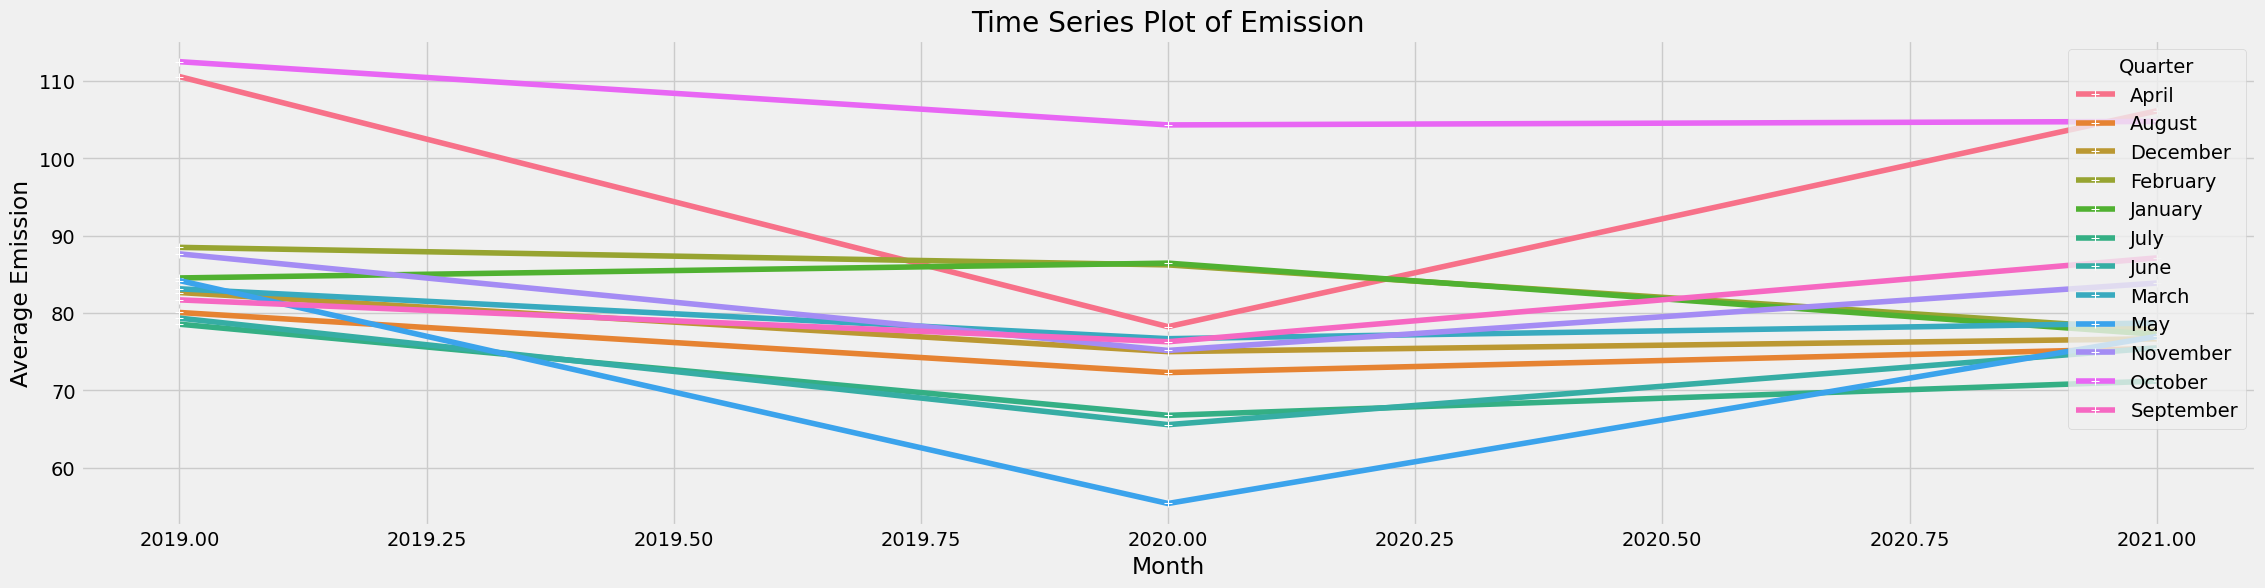

In [130]:
plt.figure(figsize=(25, 6))
mean_emission_by_mn = train.groupby(['month_name', 'year'])['emission'].mean().reset_index()
mean_emission_by_mn['month_name'] = mean_emission_by_mn['month_name'].astype('category')

sns.lineplot(x="year", y="emission", hue="month_name", data=mean_emission_by_mn, marker="+")
plt.title('Time Series Plot of Emission')
plt.xlabel('Month')
plt.ylabel('Average Emission')
plt.legend(title='Quarter', loc='upper right')
plt.show()

## XGBoost

Train/Test Split

We don't need to split the dataset since we already have a test dataset.

In [131]:
train.head()

,latitude,longitude,year,week_no,location,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,emission,month_number,month_name,quarter
0,-0.51,29.29,2019,0,1,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,52.775928,-149.875565,25.965214,0.000044,1.220016e-05,0.000032,3.750994,1,January,1
1,-0.51,29.29,2019,1,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.000030,4.025176,1,January,1
2,-0.51,29.29,2019,2,1,0.000514,0.748199,0.000385,0.110018,72.795837,...,52.344378,-133.683714,31.586838,0.000031,4.267369e-07,0.000030,4.231381,1,January,1
3,-0.51,29.29,2019,3,1,0.000048,0.834848,0.000035,0.158418,-7.925870,...,39.676184,-142.575915,24.810699,0.000044,1.220016e-05,0.000032,4.305286,1,January,1
4,-0.51,29.29,2019,4,1,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,33.703073,-134.854258,24.629593,0.000051,2.056437e-05,0.000030,4.347317,1,January,1


In [139]:
train_fit = train[(train['year'] == 2019) | (train['year'] == 2020)]
test_fit = train[train['year']==2021]

In [143]:
FEATURES = ['week_no','month_number', 'year', 'quarter']
TARGET = 'emission'

In [144]:
X_train = train_fit[FEATURES]
y_train = train_fit[TARGET]

X_test = test_fit[FEATURES]
y_test = test_fit[TARGET]

In [145]:
# Model building
# XGBoost Regressor

reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds=50, learning_rate=0.001)
reg.fit(X_train, y_train,
         eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:143.20031	validation_1-rmse:146.46871
[100]	validation_0-rmse:143.08321	validation_1-rmse:146.41102
[200]	validation_0-rmse:142.98719	validation_1-rmse:146.36967
[300]	validation_0-rmse:142.90851	validation_1-rmse:146.34106
[400]	validation_0-rmse:142.84405	validation_1-rmse:146.32254
[500]	validation_0-rmse:142.79125	validation_1-rmse:146.31195
[600]	validation_0-rmse:142.74797	validation_1-rmse:146.30729
[700]	validation_0-rmse:142.71249	validation_1-rmse:146.30710
[702]	validation_0-rmse:142.71185	validation_1-rmse:146.30714


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [146]:
# Feature importance
feat_importance = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

feat_importance

,importance
week_no,0.100251
month_number,0.020141
year,0.879608
quarter,0.000000


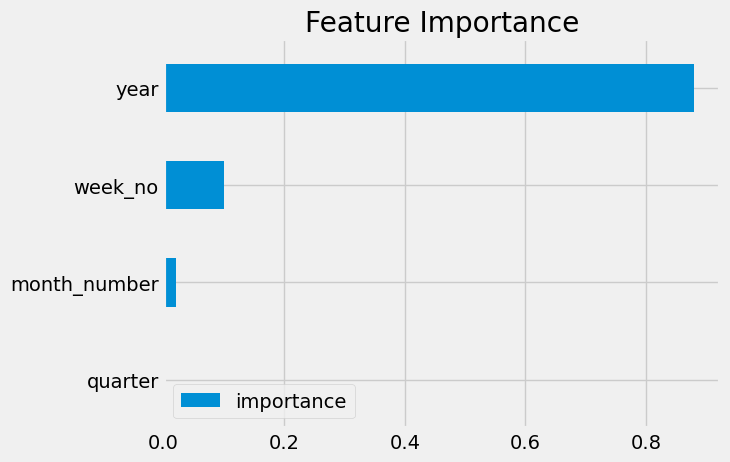

In [147]:
# Visualize on a bar plot

feat_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [148]:
# Forecast on the test dataset

test_fit['prediction'] = reg.predict(X_test)


C:\Users\harve\AppData\Local\Temp\ipykernel_17532\3776411778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_fit['prediction'] = reg.predict(X_test)


In [149]:
# Merge predictions

train_pred =train.merge(test_fit[['prediction']], how='left', left_index=True, right_index=True)

train_pred 

,latitude,longitude,year,week_no,location,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,emission,month_number,month_name,quarter,prediction
0,-0.510,29.290,2019,0,1,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,-149.875565,25.965214,0.000044,1.220016e-05,0.000032,3.750994,1,January,1,NaN
1,-0.510,29.290,2019,1,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,-140.158048,29.562000,0.000047,1.639765e-05,0.000030,4.025176,1,January,1,NaN
2,-0.510,29.290,2019,2,1,0.000514,0.748199,0.000385,0.110018,72.795837,...,-133.683714,31.586838,0.000031,4.267369e-07,0.000030,4.231381,1,January,1,NaN
3,-0.510,29.290,2019,3,1,0.000048,0.834848,0.000035,0.158418,-7.925870,...,-142.575915,24.810699,0.000044,1.220016e-05,0.000032,4.305286,1,January,1,NaN
4,-0.510,29.290,2019,4,1,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,-134.854258,24.629593,0.000051,2.056437e-05,0.000030,4.347317,1,January,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,497,0.000284,1.195643,0.000340,0.191313,72.820518,...,-127.665868,35.158394,0.000048,8.024310e-06,0.000040,29.404171,11,November,4,78.649124
79019,-3.299,30.301,2021,49,497,0.000083,1.130868,0.000063,0.177222,-12.856753,...,-131.715914,31.659301,0.000049,8.476496e-06,0.000040,29.186497,12,December,4,78.649124
79020,-3.299,30.301,2021,50,497,0.000048,0.834848,0.000035,0.158418,-7.925870,...,-142.806373,26.133751,0.000043,2.979501e-06,0.000039,29.131205,12,December,4,79.177101
79021,-3.299,30.301,2021,51,497,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,-129.550014,33.910437,0.000049,1.014400e-05,0.000039,28.125792,12,December,4,77.018951


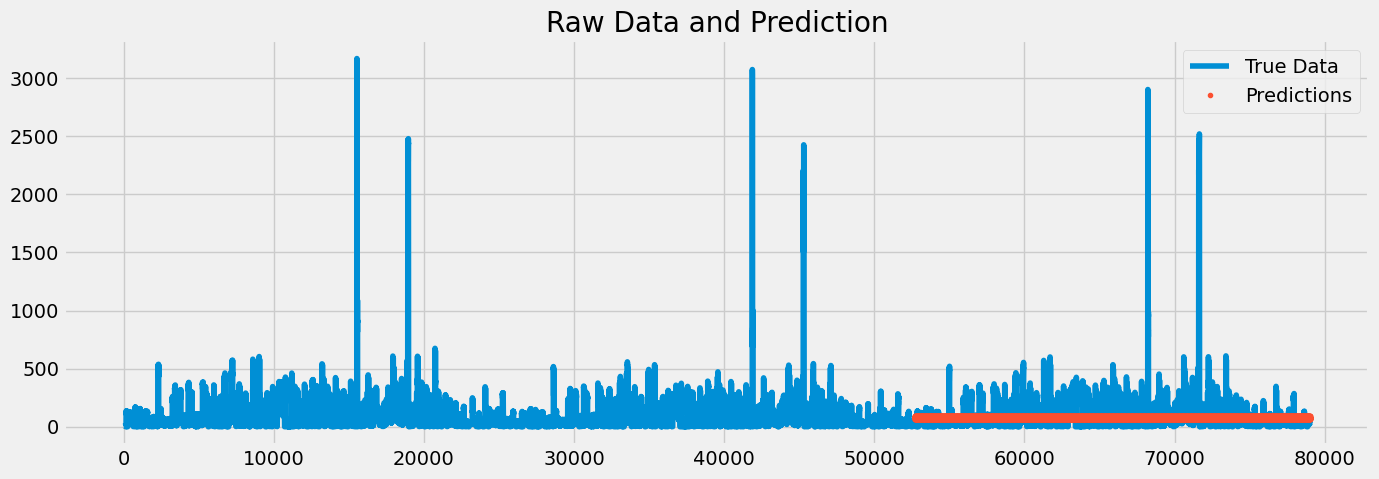

In [150]:
ax = train_pred[['emission']].plot(figsize=(15,5))
train_pred['prediction'].plot(ax=ax, style='.')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [151]:
# Evaluation metric using RMSE

score = np.sqrt(mean_squared_error(test_fit['emission'], test_fit['prediction']))

print(f'RMSE Score on test set: {score:0.2f}')

# Calculate R-squared
r2 = r2_score(test_fit['emission'], test_fit['prediction'])

print(f'R-squared: {r2:.2f}')

RMSE Score on test set: 146.31
R-squared: 0.00


In [173]:
# Define a range of values for n_estimators
n_estimators_range = np.arange(10, 2001, 100)

# Function to perform grid search over n_estimators
def tune_n_estimators(X, y, n_estimators_range):
    param_grid = {'n_estimators': n_estimators_range}
    
    xgb_model = XGBRegressor()

    grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=10)
    grid_search.fit(X, y)

    return grid_search

# Run the function to tune n_estimators
grid_search_n_estimators = tune_n_estimators(X_train, y_train, n_estimators_range)


In [174]:
# Get the best hyperparameter values
best_n_estimators = grid_search_n_estimators.best_params_['n_estimators']

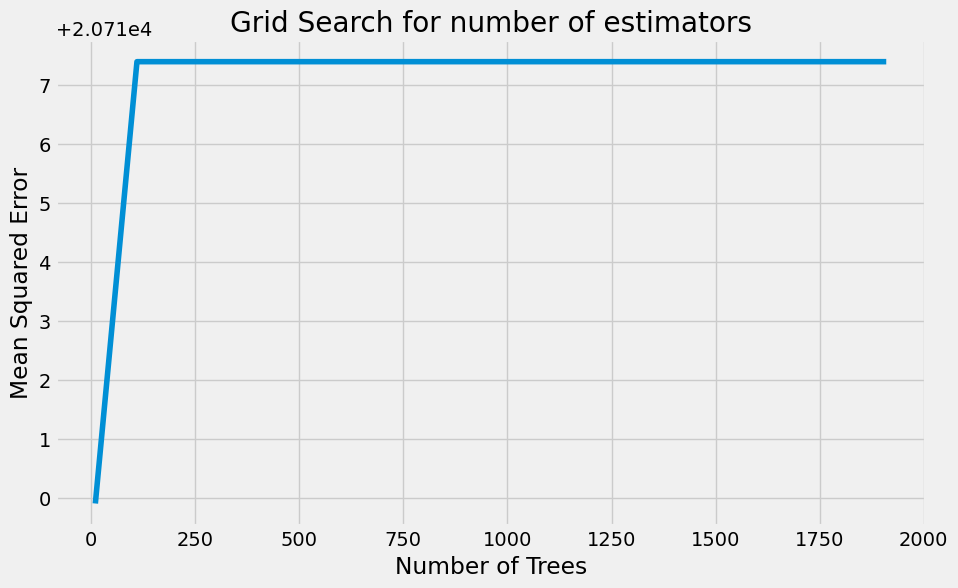

In [175]:
# Plot the values against MSE
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, -grid_search_n_estimators.cv_results_['mean_test_score'])
plt.title('Grid Search for number of estimators')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.show()

In [176]:
# Define a range of values for learning_rate
learning_rate_range = np.logspace(-5, 0, 6)

# Function to perform grid search over learning_rate
def tune_learning_rate(X, y, best_n_estimators, learning_rate_range):
    param_grid = {'learning_rate': learning_rate_range}
    
    xgb_model = XGBRegressor(n_estimators=best_n_estimators)

    grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X, y)

    return grid_search

# Run the function to tune learning_rate
grid_search_learning_rate = tune_learning_rate(X_train, y_train, best_n_estimators, learning_rate_range)

In [177]:
# Get the best hyperparameter values
best_learning_rate = grid_search_learning_rate.best_params_['learning_rate']

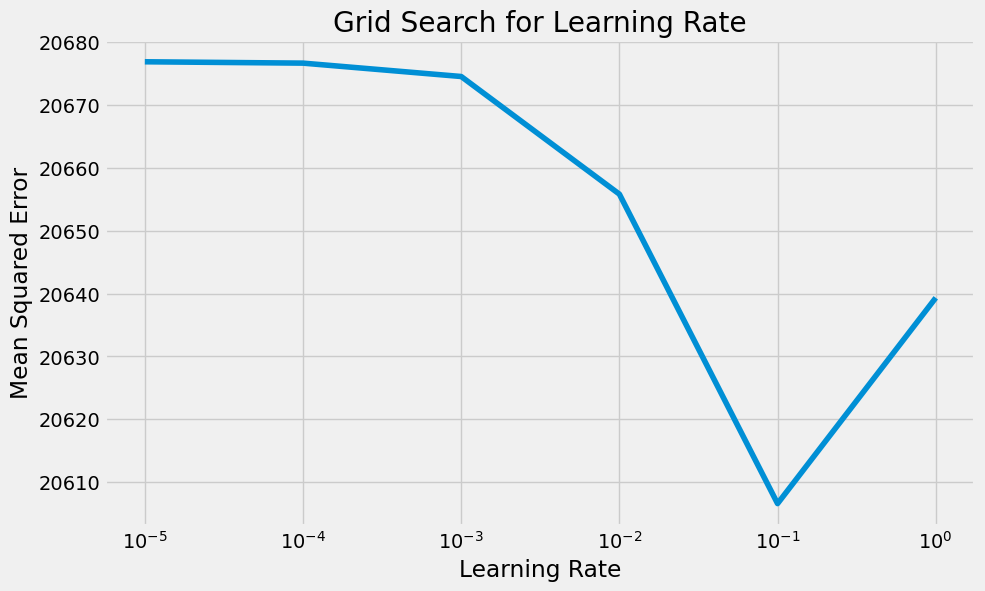

In [178]:
# Plot the values against MSE
plt.figure(figsize=(10, 6))
plt.semilogx(learning_rate_range, -grid_search_learning_rate.cv_results_['mean_test_score'])
plt.title('Grid Search for Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.show()

In [180]:
# Model building
# XGBoost Regressor

reg = xgb.XGBRegressor(n_estimators = 250, early_stopping_rounds=50, learning_rate=0.1)
reg.fit(X_train, y_train,
         eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:143.07874	validation_1-rmse:146.40894


[55]	validation_0-rmse:142.54883	validation_1-rmse:146.49763


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Feature importance
feat_importance = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

feat_importance

,importance
week_no,0.100251
month_number,0.020141
year,0.879608
quarter,0.000000


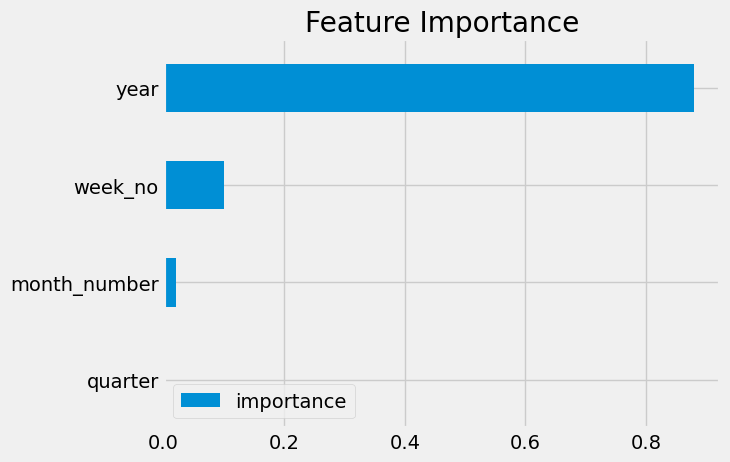

In [ ]:
# Visualize on a bar plot

feat_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
# Forecast on the test dataset

test_fit['prediction'] = reg.predict(X_test)


C:\Users\harve\AppData\Local\Temp\ipykernel_17532\3776411778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_fit['prediction'] = reg.predict(X_test)


In [ ]:
# Merge predictions

train_pred =train.merge(test_fit[['prediction']], how='left', left_index=True, right_index=True)

train_pred 

,latitude,longitude,year,week_no,location,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,emission,month_number,month_name,quarter,prediction
0,-0.510,29.290,2019,0,1,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,-149.875565,25.965214,0.000044,1.220016e-05,0.000032,3.750994,1,January,1,NaN
1,-0.510,29.290,2019,1,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,-140.158048,29.562000,0.000047,1.639765e-05,0.000030,4.025176,1,January,1,NaN
2,-0.510,29.290,2019,2,1,0.000514,0.748199,0.000385,0.110018,72.795837,...,-133.683714,31.586838,0.000031,4.267369e-07,0.000030,4.231381,1,January,1,NaN
3,-0.510,29.290,2019,3,1,0.000048,0.834848,0.000035,0.158418,-7.925870,...,-142.575915,24.810699,0.000044,1.220016e-05,0.000032,4.305286,1,January,1,NaN
4,-0.510,29.290,2019,4,1,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,-134.854258,24.629593,0.000051,2.056437e-05,0.000030,4.347317,1,January,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,497,0.000284,1.195643,0.000340,0.191313,72.820518,...,-127.665868,35.158394,0.000048,8.024310e-06,0.000040,29.404171,11,November,4,78.649124
79019,-3.299,30.301,2021,49,497,0.000083,1.130868,0.000063,0.177222,-12.856753,...,-131.715914,31.659301,0.000049,8.476496e-06,0.000040,29.186497,12,December,4,78.649124
79020,-3.299,30.301,2021,50,497,0.000048,0.834848,0.000035,0.158418,-7.925870,...,-142.806373,26.133751,0.000043,2.979501e-06,0.000039,29.131205,12,December,4,79.177101
79021,-3.299,30.301,2021,51,497,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,-129.550014,33.910437,0.000049,1.014400e-05,0.000039,28.125792,12,December,4,77.018951


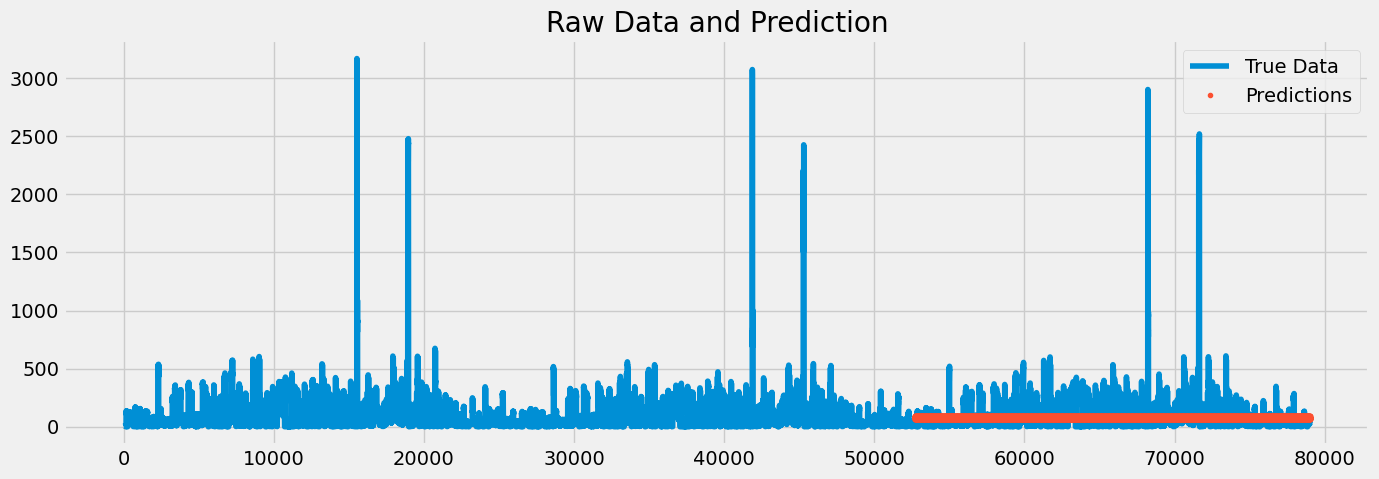

In [ ]:
ax = train_pred[['emission']].plot(figsize=(15,5))
train_pred['prediction'].plot(ax=ax, style='.')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [ ]:
# Evaluation metric using RMSE

score = np.sqrt(mean_squared_error(test_fit['emission'], test_fit['prediction']))

print(f'RMSE Score on test set: {score:0.2f}')

# Calculate R-squared
r2 = r2_score(test_fit['emission'], test_fit['prediction'])

print(f'R-squared: {r2:.2f}')

RMSE Score on test set: 146.31
R-squared: 0.00


In [152]:
FEATURES = ['year', 'week_no', 'location', 'month_number',
            'SulphurDioxide_SO2_column_number_density',
            'SulphurDioxide_SO2_column_number_density_amf',
            'SulphurDioxide_SO2_slant_column_number_density',
            'SulphurDioxide_cloud_fraction',
            'SulphurDioxide_sensor_azimuth_angle',
            'SulphurDioxide_sensor_zenith_angle',
            'SulphurDioxide_solar_azimuth_angle',
            'SulphurDioxide_solar_zenith_angle',
            'SulphurDioxide_SO2_column_number_density_15km',
            'CarbonMonoxide_CO_column_number_density',
            'CarbonMonoxide_H2O_column_number_density',
            'CarbonMonoxide_cloud_height',
            'CarbonMonoxide_sensor_altitude',
            'CarbonMonoxide_sensor_azimuth_angle',
            'CarbonMonoxide_sensor_zenith_angle',
            'CarbonMonoxide_solar_azimuth_angle',
            'CarbonMonoxide_solar_zenith_angle',
            'NitrogenDioxide_NO2_column_number_density',
            'NitrogenDioxide_tropospheric_NO2_column_number_density',
            'NitrogenDioxide_stratospheric_NO2_column_number_density']


TARGET = 'emission'

In [153]:
X_train1 = train_fit[FEATURES]
y_train1 = train_fit[TARGET]

X_test1 = test_fit[FEATURES]
y_test1 = test_fit[TARGET]

In [183]:
# Model building
# XGBoost Regressor

reg = xgb.XGBRegressor(n_estimators = 125, early_stopping_rounds=50, learning_rate=0.1)
reg.fit(X_train1, y_train1,
         eval_set=[(X_train1, y_train1), (X_test1, y_test1)],
        verbose=100)

[0]	validation_0-rmse:137.77300	validation_1-rmse:141.38089
[100]	validation_0-rmse:77.43012	validation_1-rmse:99.03763
[124]	validation_0-rmse:74.97143	validation_1-rmse:98.29117


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=125, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [184]:
# Feature importance
feat_importance = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

feat_importance

,importance
year,0.017533
week_no,0.102638
location,0.186271
month_number,0.013888
SulphurDioxide_SO2_column_number_density,0.016009
SulphurDioxide_SO2_column_number_density_amf,0.053157
SulphurDioxide_SO2_slant_column_number_density,0.011858
SulphurDioxide_cloud_fraction,0.017381
SulphurDioxide_sensor_azimuth_angle,0.026448
SulphurDioxide_sensor_zenith_angle,0.027019


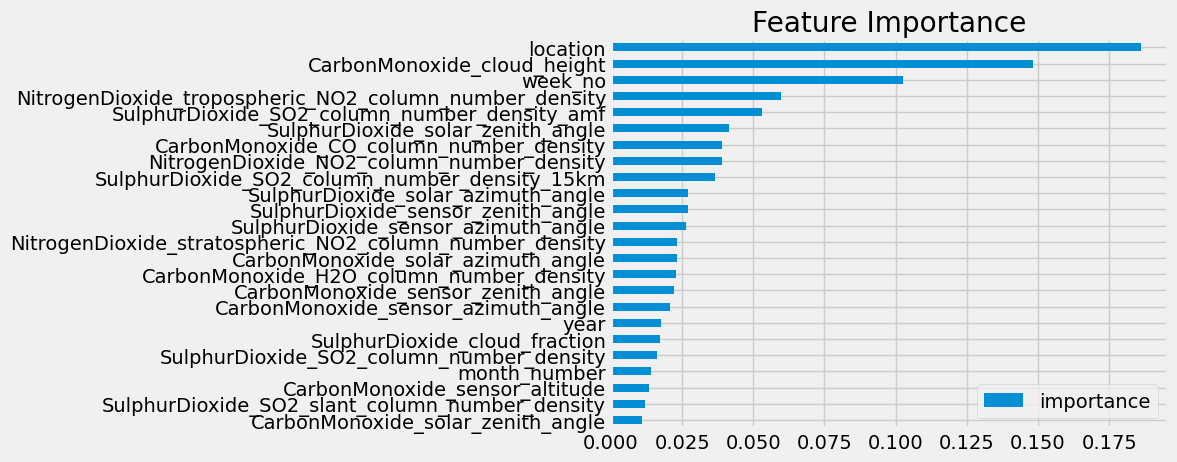

In [185]:
# Visualize on a bar plot

feat_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [186]:
# Forecast on the test dataset

test_fit['prediction'] = reg.predict(X_test1)


C:\Users\harve\AppData\Local\Temp\ipykernel_17532\688310838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_fit['prediction'] = reg.predict(X_test1)


In [187]:
# Merge predictions

train_pred =train.merge(test_fit[['prediction']], how='left', left_index=True, right_index=True)

train_pred 

,latitude,longitude,year,week_no,location,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,emission,month_number,month_name,quarter,prediction
0,-0.510,29.290,2019,0,1,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,-149.875565,25.965214,0.000044,1.220016e-05,0.000032,3.750994,1,January,1,NaN
1,-0.510,29.290,2019,1,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,-140.158048,29.562000,0.000047,1.639765e-05,0.000030,4.025176,1,January,1,NaN
2,-0.510,29.290,2019,2,1,0.000514,0.748199,0.000385,0.110018,72.795837,...,-133.683714,31.586838,0.000031,4.267369e-07,0.000030,4.231381,1,January,1,NaN
3,-0.510,29.290,2019,3,1,0.000048,0.834848,0.000035,0.158418,-7.925870,...,-142.575915,24.810699,0.000044,1.220016e-05,0.000032,4.305286,1,January,1,NaN
4,-0.510,29.290,2019,4,1,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,-134.854258,24.629593,0.000051,2.056437e-05,0.000030,4.347317,1,January,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,497,0.000284,1.195643,0.000340,0.191313,72.820518,...,-127.665868,35.158394,0.000048,8.024310e-06,0.000040,29.404171,11,November,4,30.988537
79019,-3.299,30.301,2021,49,497,0.000083,1.130868,0.000063,0.177222,-12.856753,...,-131.715914,31.659301,0.000049,8.476496e-06,0.000040,29.186497,12,December,4,31.798342
79020,-3.299,30.301,2021,50,497,0.000048,0.834848,0.000035,0.158418,-7.925870,...,-142.806373,26.133751,0.000043,2.979501e-06,0.000039,29.131205,12,December,4,33.400436
79021,-3.299,30.301,2021,51,497,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,-129.550014,33.910437,0.000049,1.014400e-05,0.000039,28.125792,12,December,4,23.740280


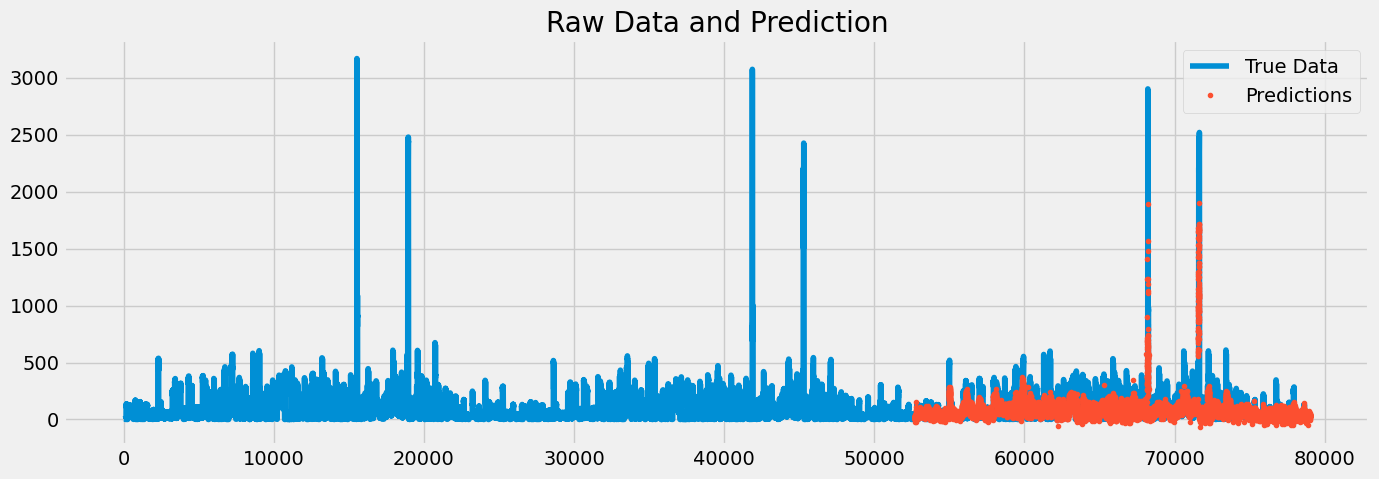

In [188]:
ax = train_pred[['emission']].plot(figsize=(15,5))
train_pred['prediction'].plot(ax=ax, style='.')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [189]:
# Evaluation metric using RMSE

score = np.sqrt(mean_squared_error(test_fit['emission'], test_fit['prediction']))

print(f'RMSE Score on test set: {score:0.2f}')

# Calculate R-squared
r2 = r2_score(test_fit['emission'], test_fit['prediction'])

print(f'R-squared: {r2:.2f}')

RMSE Score on test set: 98.27
R-squared: 0.55


## Support Vector Machine

In [191]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM regressor
reg_svm = SVR(kernel='linear', C=1.0)  # You can choose different kernel functions and adjust parameters

# Train the SVM model
reg_svm.fit(X_train_scaled, y_train)


SVR(kernel='linear')

In [192]:
# Make predictions
y_pred_svm = reg_svm.predict(X_test_scaled)


In [197]:
# Evaluate the model (example using mean squared error)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f'Root Mean Squared Error (SVM): {round(np.sqrt(mse_svm),2)}')


Root Mean Squared Error (SVM): 153.93


In [198]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

# Create an SVM regressor
reg_svm = SVR(kernel='linear', C=1.0)  # You can choose different kernel functions and adjust parameters

# Train the SVM model
reg_svm.fit(X_train_scaled, y_train1)


SVR(kernel='linear')

In [199]:
# Make predictions
y_pred_svm = reg_svm.predict(X_test_scaled)


In [200]:
# Evaluate the model (example using mean squared error)
mse_svm = mean_squared_error(y_test1, y_pred_svm)
print(f'Root Mean Squared Error (SVM): {round(np.sqrt(mse_svm),2)}')


Root Mean Squared Error (SVM): 153.14
